# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.7/78.2 GB disk)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/212889447-69e5bdf1-5800-4e29-835e-2ed2336dede2.jpg" width="600">

# Eport formats

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



# Train YOLO v8 on smokers dataset


In [ ]:
!pip install roboflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 501.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 2.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=d8a07c590da9437fb250a6cb32efd6d8e835a5fc9e96b936e985780197ad3922
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

Dataset link - https://universe.roboflow.com/main-tetij/smokers-ijbca/dataset/2

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="feMbZMmqeJyRchetFhiC")
project = rf.workspace("main-tetij").project("smokers-ijbca")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.58, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to smokers-2 in yolov8:: 100%|██████████| 5691/5691 [00:02<00:00, 2227.26it/s]


In [ ]:
from ultralytics import YOLO

# load model with weights
model = YOLO('yolov8s.pt')

# Train and validate the model
results = model.train(
    data='/content/smokers-2/data.yaml', 
    epochs=100,
    batch=-1,
    seed=42
)

Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/smokers-2/data.yaml, epochs=100, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.09G reserved, 0.08G allocated, 14.57G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    11136761       28.65         0.325         135.9         33.81        (1, 3, 640, 640)                    list
    11136761        57.3         0.526          24.5         19.79        (2, 3, 640, 640)                    list
    11136761       114.6         0.998         25.94         24.94        (4, 3, 640, 640)                    list
    11136761       229.2         1.940         40.23         39.74        (8, 3, 640, 640)                    list
    11136761       458.4         3.712         64.65         76.36       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 42 for CUDA:0 9.80G/14.75G (66%) ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=

ValueError: ignored

In [ ]:
results = model('https://hi-news.ru/wp-content/uploads/2022/10/smoke_clean_4.jpg')


Found https://hi-news.ru/wp-content/uploads/2022/10/smoke_clean_4.jpg locally at smoke_clean_4.jpg
image 1/1 /content/smoke_clean_4.jpg: 416x640 1 cigarette, 1 person, 19.3ms
Speed: 0.8ms preprocess, 19.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


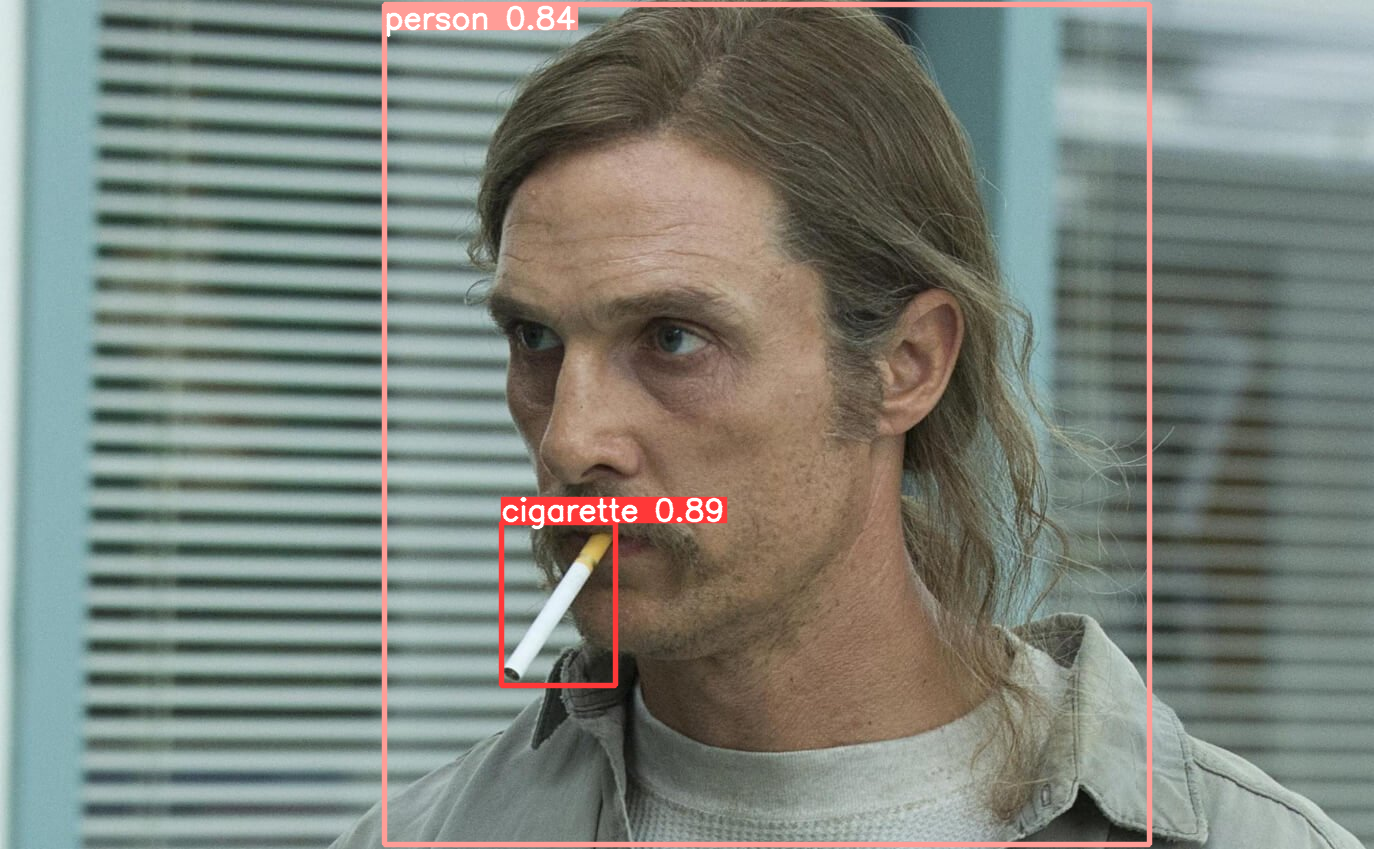

In [ ]:
from google.colab.patches import cv2_imshow

res_plotted = results[0].plot()
cv2_imshow(res_plotted)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.move("/content/runs", "/content/drive/MyDrive/Colab Notebooks/data")

'/content/drive/MyDrive/Colab Notebooks/data/runs'

# 6. Tasks

YOLOv8 can train, val, predict and export models for the 3 primary tasks in vision AI: detection, segmentation and classification.

<img width="1024" src="https://user-images.githubusercontent.com/26833433/212094133-6bb8c21c-3d47-41df-a512-81c5931054ae.png">


## 1. Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [ ]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='coco128.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 2. Segmentation

YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [ ]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco128-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 3. Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='mnist160', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

# Appendix

Additional content below.

In [ ]:
# Git clone install (for development)
!git clone https://github.com/ultralytics/ultralytics -b main
%pip install -qe ultralytics

In [ ]:
# Run YOLOv8 tests (git clone install only)
!pytest ultralytics/tests

In [ ]:
# Validate multiple models
for x in 'nsmlx':
  !yolo val model=yolov8{x}.pt data=coco.yaml